Importar librerías

In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_validate, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [ ]:
# Compute a point of a Mandelbrot-like fractal
# Inputs:
# a, b = real and imaginary parts of the complex number z_0 = a + b*i that
#        initiates the succession of complex numbers
# parameter = real number between 0 and 1 that is used to obtain different fractals,
#        all of which are similar to Mandelbrot's. The value parameter == 0 yields
#        the original Mandelbrot fractal
# Output:
# color_pixel = float between 0 and 1 that indicates how many terms the
#        succession of complex numbers takes to diverge: 0 indicates that it does
#        not diverge before MAX_ITERATIONS terms; 1 indicates that it diverges
#        immediately, i.e. at the second term

# Maximum iterations to check whether the succession of complex numbers diverges
MAX_ITERATIONS = 80

def mandelbrot_like(a,b,parameter):
    c = complex(a,b)
    z = 0
    n = 0
    while abs(z) <= 2 and n < MAX_ITERATIONS:
        aux = z - parameter
        z = aux*aux + c
        n += 1
    color_pixel = 1.0 - (n / MAX_ITERATIONS)
    return color_pixel

# Obtain a regression dataset based on a Mandelbrot-like fractal
# Inputs:
# start_a, end_a = starting value and ending value
#      for the real part of the complex number
#      z_0 = a + b*i that initiates the succession of complex numbers
# start_b, end_b = starting value and ending value
#      for the imaginary part of the complex number
#      z_0 = a + b*i that initiates the succession of complex numbers
# parameter = real number between 0 and 1 that is used to obtain different fractals,
#        all of which are similar to Mandelbrot's. The value parameter == 0 yields
#        the original Mandelbrot fractal
# num_samples = number of samples to obtain
# Output:
# matrix = ndarray of shape (num_samples, 2) which contains
#      floats between 0 and 1 that indicate how many terms the
#        suc  : 0 indicates that it does
#        not diverge before MAX_ITERATIONS terms; 1 indicates that it diverges
#        immediately, i.e. at the second term
def mandelbrot_regression(start_a, end_a, start_b, end_b, parameter, num_samples):
  input_values = np.zeros((num_samples, 2))
  input_values[:, 0] = np.random.uniform(start_a, end_a, size=(num_samples,) )
  input_values[:, 1] = np.random.uniform(start_b, end_b, size=(num_samples,) )
  output_values = np.zeros((num_samples, ))
  for ndx in range(num_samples):
    output_values[ndx] = mandelbrot_like(input_values[ndx, 0], input_values[ndx, 1], parameter)
  return input_values, output_values

# Obtain a matrix filled with the color values of a Mandelbrot-like fractal
# Inputs:
# start_a, end_a, num_a = starting value, ending value, and number of values
#      for the real part of the complex number
#      z_0 = a + b*i that initiates the succession of complex numbers
# start_b, end_b, num_b = starting value, ending value, and number of values
#      for the imaginary part of the complex number
#      z_0 = a + b*i that initiates the succession of complex numbers
# parameter = real number between 0 and 1 that is used to obtain different fractals,
#        all of which are similar to Mandelbrot's. The value parameter == 0 yields
#        the original Mandelbrot fractal
# Output:
# matrix = ndarray of shape (num_a, num_b) which contains
#      floats between 0 and 1 that indicate how many terms the
#        succession of complex numbers takes to diverge: 0 indicates that it does
#        not diverge before MAX_ITERATIONS terms; 1 indicates that it diverges
#        immediately, i.e. at the second term
def mandelbrot_matrix(start_a, end_a, num_a, start_b, end_b, num_b, parameter):
  values_a = np.linspace(start_a, end_a, num_a)
  values_b = np.linspace(start_b, end_b, num_b)
  matrix = np.zeros((values_a.size, values_b.size))
  for index_a, a in enumerate(values_a):
      for index_b, b in enumerate(values_b):
          matrix[index_a, index_b] = mandelbrot_like(a, b, parameter)
  return matrix

# Ejercicio 1 y 2
Generar conjuntos de datos

In [ ]:
np.random.seed(42)
train_x, train_y = mandelbrot_regression(-1, 1, -1, 1, 0, 1000)
train_y.shape

(1000,)

Entrenar modelos

In [ ]:
#Hyper parameters
neuronas_en_capa_oculta = [1, 2, 5, 10, 20, 50, 100] #mlp
parametro_gamma = [0.001, 0.01, 0.1, 1, 10, 100] #svr
crossValidationNum = 10
#Prepare arrays for model metrics
mlp_models_num = len(neuronas_en_capa_oculta)
mlp_mse = np.zeros((mlp_models_num, crossValidationNum))
mlp_mae = np.zeros((mlp_models_num, crossValidationNum))
mlp_rsquared = np.zeros((mlp_models_num, crossValidationNum))

svr_models_num = len(parametro_gamma)
svr_mse = np.zeros((svr_models_num, crossValidationNum))
svr_mae = np.zeros((svr_models_num, crossValidationNum))
svr_rsquared = np.zeros((svr_models_num, crossValidationNum))

MLP Regressor

In [ ]:
for idx, numNeuronas in enumerate(neuronas_en_capa_oculta):
  mlp = MLPRegressor(
    hidden_layer_sizes=(numNeuronas,),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    alpha=0.0001
  )
  kf = KFold(n_splits=10, shuffle=True, random_state=42)
  scoring = {
    'MSE': 'neg_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
  }

  # 5. Run Cross-Validation
  results = cross_validate(mlp, train_x, train_y, cv=kf, scoring=scoring)

  # 6. Extract and Convert Results (Flip negative signs to positive)
  mlp_mse[idx] = -results['test_MSE']
  mlp_mae[idx] = -results['test_MAE']
  mlp_rsquared[idx]  = results['test_R2']


Se puede ver que el rendimiento del modelo se va mejorando cuando se aumenta el número de neuronas en la capa oculta. Obtenemos el mejor rendimiento con 100 neuronas pero no es mucho mejor que el rendimiento con 50 neuronas. Por lo tanto, es posible que sea mejor usar el modelo con 50 neuronas para evitar añadir mas complejidad en el modelo.

---



SVR

In [ ]:
for idx, gamma in enumerate(parametro_gamma):
  svr = SVR(
    gamma=gamma,
    kernel='rbf'
  )
  kf = KFold(n_splits=10, shuffle=True, random_state=42)
  scoring = {
    'MSE': 'neg_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
  }

  # 5. Run Cross-Validation
  results = cross_validate(svr, train_x, train_y, cv=kf, scoring=scoring)

  # 6. Extract and Convert Results (Flip negative signs to positive)
  svr_mse[idx] = -results['test_MSE']
  svr_mae[idx] = -results['test_MAE']
  svr_rsquared[idx]  = results['test_R2']

Gráficas

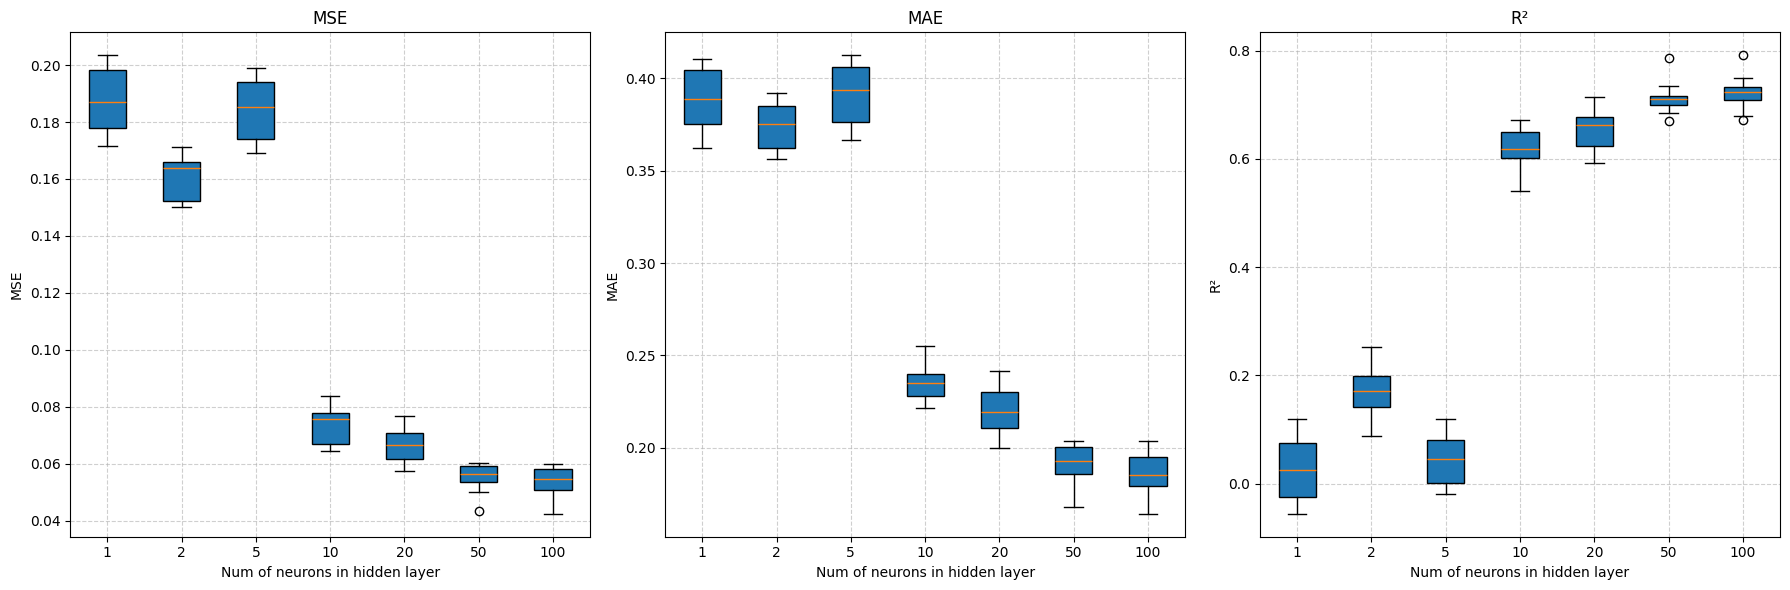

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
metrics_data = [
    (mlp_mse, 'MSE'),
    (mlp_mae, 'MAE'),
    (mlp_rsquared, 'R²')
]

for ax, (data, title) in zip(axes, metrics_data):
    ax.boxplot([row for row in data], patch_artist=True)
    ax.set_title(title)
    ax.set_xlabel('Num of neurons in hidden layer')
    ax.set_ylabel(title)
    ax.set_xticklabels([neurons_num for neurons_num in neuronas_en_capa_oculta])
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Se puede ver que el rendimiento del modelo se va mejorando cuando se aumenta el número de neuronas en la capa oculta. Obtenemos el mejor rendimiento con 100 neuronas pero no es mucho mejor que el rendimiento con 50 neuronas. Por lo tanto, es posible que sea mejor usar el modelo con 50 neuronas para evitar añadir mas complejidad en el modelo.

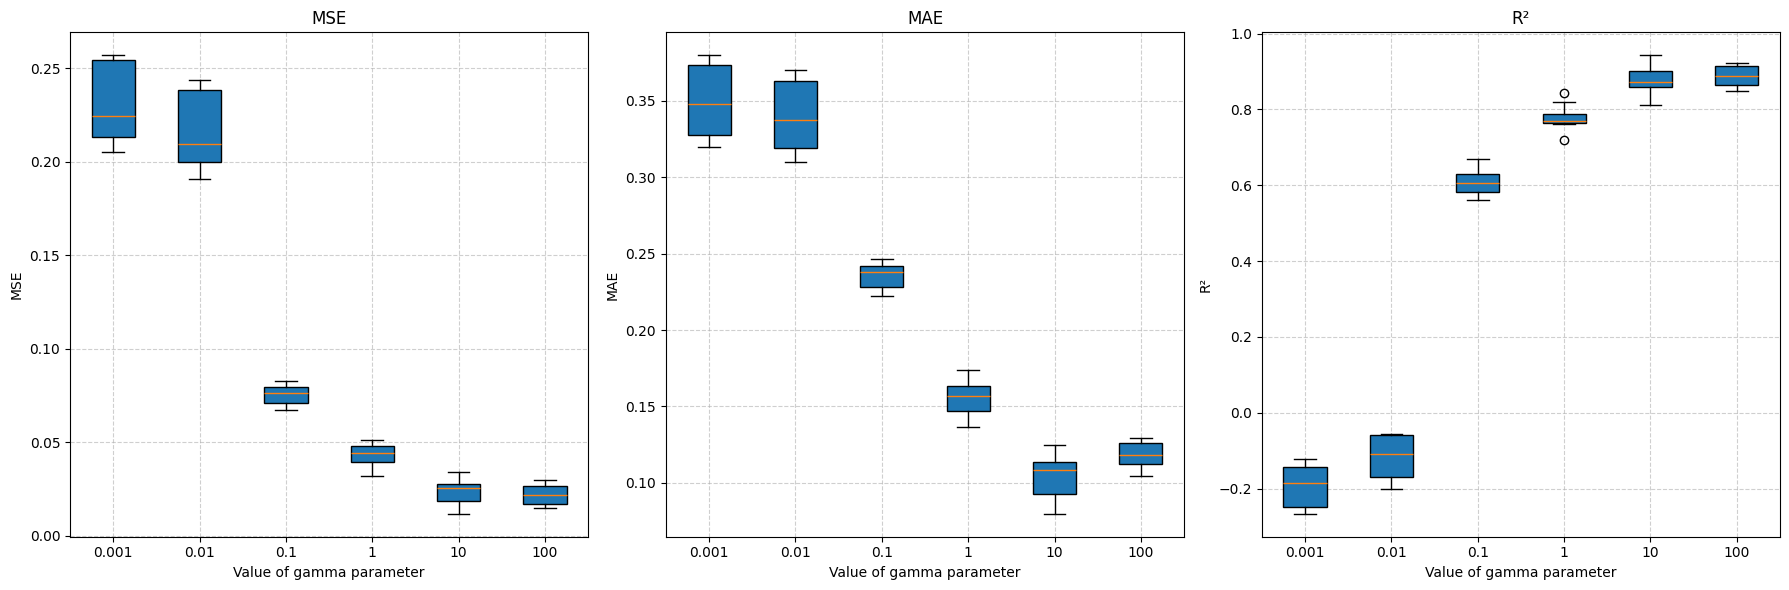

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
metrics_data = [
    (svr_mse, 'MSE'),
    (svr_mae, 'MAE'),
    (svr_rsquared, 'R²')
]

for ax, (data, title) in zip(axes, metrics_data):
    ax.boxplot([row for row in data], patch_artist=True)
    ax.set_title(title)
    ax.set_xlabel('Value of gamma parameter')
    ax.set_ylabel(title)
    ax.set_xticklabels([gamma for gamma in parametro_gamma])
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Para empezar, el rendimiento se mejora cuando el valor del parámetro gamma se va aumentando, algo que se ve en todos los métricos. Obtenemos los mejores resultados para los valores 10, 100. Visto que los resultados con 10, 100 son similares, elegiría 10 como valor del parámetro para evitar añadir complejidad.

Además, se observa que los resultados del modelo svr son mejores que los del modelo mlp

Finalmente, se ve que los mejores modelos tienen un valor de r-squared alto(~.9) exlicando el mayor porcentaje de la varianza.

# Ejercicio 3

Mejor modelo: Svr con gamma = 100

Peor modelo: Svr con gamma = 0.001

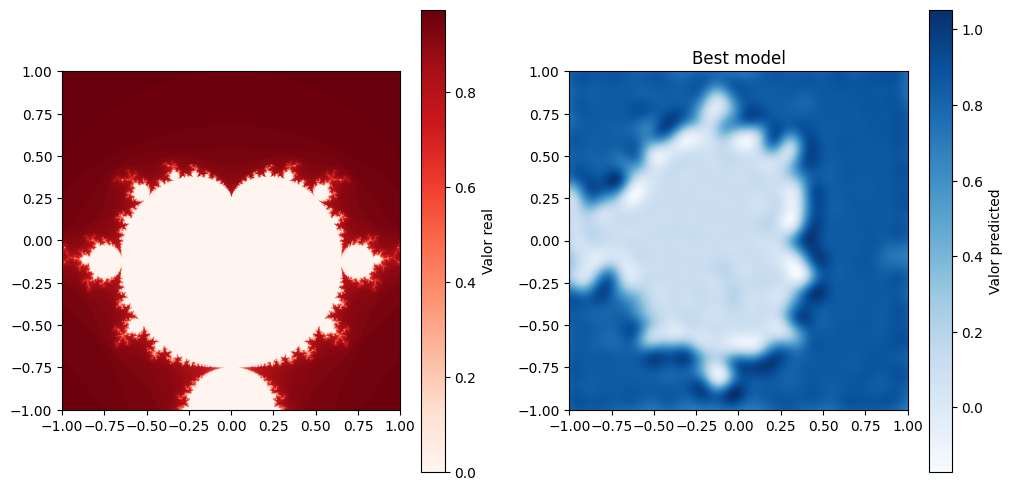

<Figure size 640x480 with 0 Axes>

In [ ]:
x = np.linspace(-1, 1, 500)
y = np.linspace(-1, 1, 500)
xv, yv = np.meshgrid(x, y)
z_real = mandelbrot_matrix(-1, 1, 500, -1, 1, 500, 0)

best_model = SVR(
    gamma=100,
    kernel='rbf'
)
best_model.fit(train_x, train_y)
z_best_predictions = best_model.predict(np.column_stack((xv.ravel(), yv.ravel()))).reshape(500, 500)

plot_extent = (x.min(), x.max(), y.min(), y.max())

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
mappableReal = axes[0].imshow(z_real, cmap='Reds', origin='lower', extent=plot_extent)
mappablePredicted = axes[1].imshow(z_best_predictions, cmap='Blues', origin='lower', extent=plot_extent)
plt.colorbar(mappableReal, ax=axes[0], label='Valor real')
plt.colorbar(mappablePredicted, ax=axes[1], label='Valor predicted')
plt.title('Best model')

plt.show()

plt.tight_layout()


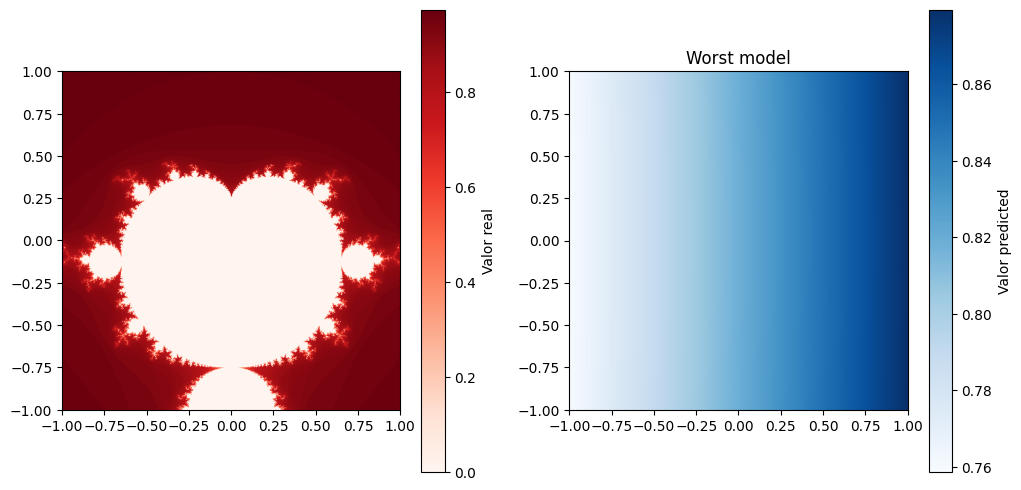

<Figure size 640x480 with 0 Axes>

In [ ]:
worst_model = SVR(
    gamma=0.001,
    kernel='rbf'
)
worst_model.fit(train_x, train_y)
z_worst_predictions = worst_model.predict(np.column_stack((xv.ravel(), yv.ravel()))).reshape(500, 500)
plot_extent = (x.min(), x.max(), y.min(), y.max())

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
mappableReal = axes[0].imshow(z_real, cmap='Reds', origin='lower', extent=plot_extent)
mappablePredicted = axes[1].imshow(z_worst_predictions, cmap='Blues', origin='lower', extent=plot_extent)
plt.colorbar(mappableReal, ax=axes[0], label='Valor real')
plt.colorbar(mappablePredicted, ax=axes[1], label='Valor predicted')
plt.title('Worst model')

plt.show()

plt.tight_layout()


In [ ]:
z_real

array([[0.9625, 0.9625, 0.9625, ..., 0.9625, 0.9625, 0.9625],
       [0.9625, 0.9625, 0.9625, ..., 0.9625, 0.9625, 0.9625],
       [0.9625, 0.9625, 0.9625, ..., 0.9625, 0.9625, 0.9625],
       ...,
       [0.975 , 0.975 , 0.975 , ..., 0.975 , 0.975 , 0.975 ],
       [0.975 , 0.975 , 0.975 , ..., 0.975 , 0.975 , 0.975 ],
       [0.975 , 0.975 , 0.975 , ..., 0.975 , 0.975 , 0.975 ]])

# Ejercicio 4

Se ve que el comportamiento de la función es muy complejo. Hay muchos valores iguales a 0 o muy cerca de 0 cuando los valores absolutos de x, y son pequeños, y hay muchos valores iguales a 1 o cerca de 1 cuando los valores absolutos se van aumentando. Este cambio sucede muy rápido y de maner compleja como se puede ver en la gráfica cuando cambia el color.

La diferencia entre los dos modelos es obvia. Nuestro mejor modelo logra capturar el comportamiento de la función de manera notable mientras que el peor no lo hace y parece como un plano.

# Ejercicio 5
Haremos un grid search para modelos mpl and svr con hyperparámetros

mpl:
1. 1, 2 capas ocultas
2. 50, 100 neuronas en cada capa
3. Optimizer adam, lbfgs
4. activation function relu, tanh

svr:
1. gamma: [0.1, 1, 10, 100]
2. C: [1, 10, 100, 1000]

Compararemos los modelos con mse

In [ ]:
svr_params = {
    'kernel': ['rbf'],
    'gamma': [0.1, 1, 10, 100],
    'C': [1, 10, 100, 1000]
}

mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['lbfgs', 'adam'],
    'alpha': [0.0001, 0.001]
}

grid_svr = GridSearchCV(SVR(), svr_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_svr.fit(train_x, train_y)
best_svr = grid_svr.best_estimator_
best_svr_score = -grid_svr.best_score_

grid_mlp = GridSearchCV(MLPRegressor(max_iter=3000, random_state=42), mlp_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_mlp.fit(train_x, train_y)
best_mlp = grid_mlp.best_estimator_
best_mlp_score = -grid_mlp.best_score_

if best_svr_score < best_mlp_score:
    final_model = best_svr
    print(f"\nWINNER: SVR | Params: {grid_svr.best_params_}")
    print(f"MSE: {best_svr_score:.5f}")
else:
    final_model = best_mlp
    print(f"\nWINNER: MLP | Params: {grid_mlp.best_params_}")
    print(f"MSE: {best_mlp_score:.5f}")




WINNER: MLP | Params: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'solver': 'lbfgs'}
MSE: 0.01855


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


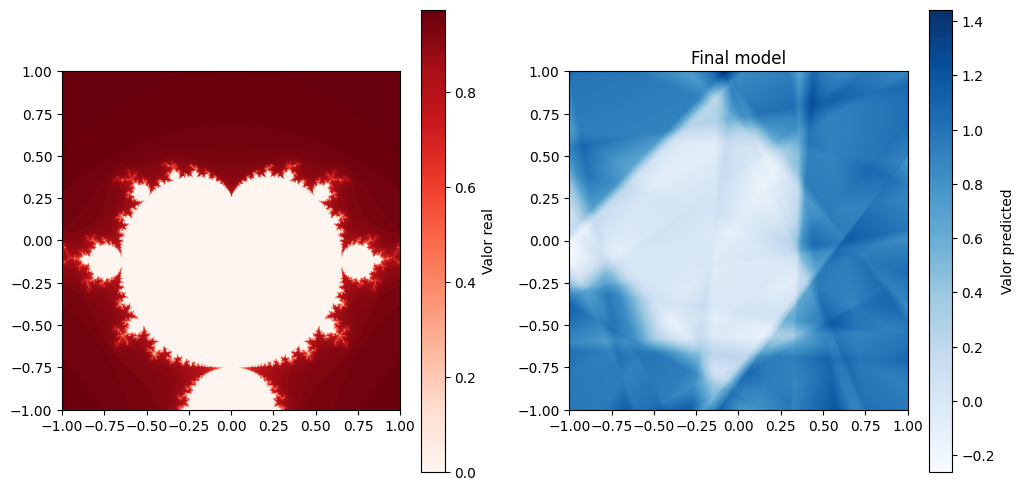

Original models mse
svr original best mse 0.021733760010725772
mlp original best mse 0.053489657419431624
Final model mse
mlp final mse 0.018549789641798244


<Figure size 640x480 with 0 Axes>

In [ ]:

z_final_predictions = final_model.predict(np.column_stack((xv.ravel(), yv.ravel()))).reshape(500, 500)
plot_extent = (x.min(), x.max(), y.min(), y.max())

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
mappableReal = axes[0].imshow(z_real, cmap='Reds', origin='lower', extent=plot_extent)
mappablePredicted = axes[1].imshow(z_final_predictions, cmap='Blues', origin='lower', extent=plot_extent)
plt.colorbar(mappableReal, ax=axes[0], label='Valor real')
plt.colorbar(mappablePredicted, ax=axes[1], label='Valor predicted')
plt.title('Final model')

plt.show()

plt.tight_layout()

print('Original models mse')
print('svr original best mse', np.mean(svr_mse[5]))
print('mlp original best mse', np.mean(mlp_mse[6]))
print('Final model mse')
print('mlp final mse', best_mlp_score )

Si comparamos el modelo que ha resultado del grid search con los modelos originales, podemos ver que el mse es considebralemente mejor que el del modelo original mlp pero casi lo mismo que el modelo original svr.

Otra ventaja del modelo mlp final en comparación con el original es que el valor alpha es más grande y por lo tanto hay más fuerza de regularización. Esto significa que hay menos peligro de sobreajuste.

A propósito del gráfico, se ve que no hay mucha diferencia en el rendimiento con el modelo original.